# Part1: Constrained Least Squares Problems

<p><font size="+1"><b>1. Linearly constrained least squares</b></font></p>
<p></p>

the (linearly) constrained least squares problem (CLS) is

minimize $\|A x-b\|^{2}$

subject to $C x=d$

$\|A x-b\|^{2}$ is the objective function and Cx=d are equality constraints, x is an n-vector, A is a m × n matrix, b is an m-vector, C is a p × n matrix, and d is a p-vector.

$\hat{\mathbf{x}}$ is a solution of CLS if $C \hat{x}=d$ and $\|A \hat{x}-b\| \leq\|A x-b\|^{2}$ holds for any n-vector x that satisfies $C x=d$


<p><font size="+1"><b>2.Methods of solving the constrained least squares problem </b></font></p>
<p></p>
2.1  KKT equations
optimality conditions in matrix-vector form:

$$2\left(A^{T} A\right) \hat{x}-2 A^{T} \mathbf{b}+C^{T} \mathbf{z}=0, C \hat{\mathbf{x}}=\mathbf{d}$$
put these together to get KKT conditions  $\left[\begin{array}{cc}{2\left(A^{T} A\right)} & {C^{T}} \\ {C} & {0}\end{array}\right]\left[\begin{array}{l}{\hat{x}} \\ {\hat{z}}\end{array}\right]=\left[\begin{array}{c}{2 A^{T} b} \\ {d}\end{array}\right]$

then we get 
$\left[\begin{array}{c}{\hat{\mathrm{x}}} \\ {\hat{\mathrm{z}}}\end{array}\right]=\left[\begin{array}{cc}{2\left(A^{T} A\right)} & {C^{T}} \\ {C} & {0}\end{array}\right]^{-1}\left[\begin{array}{c}{2 A^{T} \mathrm{b}} \\ {\mathrm{d}}\end{array}\right]$

2.2 QR factorization

<p><font size="+1"><b>3.Least norm problem (an important special case of Least Squares Problems) </b></font></p>
<p></p>
minimize $\|x\|^{2}$

subject to $c_{i}^{T} x=d_{i}, \mathrm{i}=1, \ldots, \mathrm{p}$

3.1  form Lagrangian function, with Lagrange multipliers  $ z_{1}, \ldots, z_{p} . \mathrm{L}(\mathrm{x}, \mathrm{z})=\mathrm{f}(\mathrm{x})+z_{1}\left(c_{1}^{T} x-d_{1}\right)+\cdots+z_{p}\left(c_{p}^{T} x-d_{p}\right)$

3.2  optimality conditions are $\frac{\partial \mathrm{L}}{\partial x_{i}}(\hat{x}, \hat{z})=2 \sum_{j=1}^{n}\left(A^{T} A\right)_{i j} \hat{x}_{j}-2\left(A^{T} b\right)_{i}+\sum_{j=1}^{p} \hat{z}_{j}\left(c_{j}\right)_{i}=0, i=1, \ldots, n, \frac{\partial \mathrm{L}}{\partial z_{i}}(\hat{x}, \hat{z})=c_{i}^{T} x-d_{i}=0, \mathrm{i}=$
$1, \ldots, \mathrm{p},$

3.3 Lagrange Multipliers = Derivatives of the Cost

Our first example is in two dimensions. The function F is quadratic. The set K is linear.
        
$$F(x) = x_{1}^2 +  x_{2}^2$$ on the line $$K: a_{1}x_{1} + a_{2}x_{2} = b$$
        
On the line K, we are looking for the point that is nearest to (0,0). The cost F(x) is distance squared.
We can discover this from simple calculus, after we bring the constraint equation $a_{1}x_{1} + a_{2}x_{2} = b$ into the function $F(x) = x_{1}^2 +  x_{2}^2$


 Multiply $a_{1}x_{1} + a_{2}x_{2} - b$ by an unknown multiplier λ and add it to F(x)
 
 Lagrangian $L(x,λ) = F(x) + λ(a_{1}x_{1} + a_{2}x_{2} - b)$

 $= x_{1}^2 +  x_{2}^2 + λ(a_{1}x_{1} + a_{2}x_{2} - b)$
 
 Set the derivatives $∂L/∂x_{1}$  and  $∂L/∂x_{2}$  and $ ∂L/∂λ$  to zero.
 Solve those three equations for $x_{1},x_{2},λ$

$$∂L/∂x_{1} = 2x_{1} + λa_{1} = 0$$
$$∂L/∂x_{2} = 2x_{2} + λa_{2} = 0$$
$$∂L/∂λ   = a_{1}x_{1} + a_{2}x_{2} - b$$


We can get $$λ = -2b/(a_{1}^2 +  a_{2}^2)$$
$$x_{1} = -λa_{1}/2 =  a_{1}b/(a_{1}^2 +  a_{2}^2）$$
$$x_{2} = -λa_{2}/2 =  a_{2}b/(a_{1}^2 +  a_{2}^2）$$
$$x_{1}^2 +  x_{2}^2 = b^2/(a_{1}^2 +  a_{2}^2）$$

The derivative of the minimum cost with respect to the comtrainst level b is minus the Lagrange multiplier:
$$d/db(b^2/(a_{1}^2 +  a_{2}^2）) = 2b/(a_{1}^2 +  a_{2}^2） = -λ$$




# Part2: Solving constrained least problems

<p><font size="+1"><b>1. Constraint least squares via KKT equations</b></font></p>
<p></p>
<b>Algorithm</b>
<p></p>
<p></p>
<b>Step 1</b> : Form Gram matrix. Compute $A^{T} A$
<p></p>
<b>Step 2</b> : Solve KKT equations by QR factorization and back substitution.
<p></p>
<b>Time complexity</b> :  $m n^{2}+2(n+p)^{3}$

<p></p>
<p></p>
<font size="+1"><b>An example of Constraint least squares via KKT equations in Julia: </b></font>
<p></p>
Firstly, we randomly generate A, b, C, d

In [1]:
m = 10; n = 5; p = 2;
A = randn(m,n); b = randn(m); C = randn(p,n); d = randn(p);

Define the function cls_solve_kkt() to implement the algorithm.

In [2]:
function cls_solve_KKT(A,b,C,d)
m, n = size(A)
p, n = size(C)
G = A'*A # Gram matrix
KKT = [2*G C'; C zeros(p,p)] # KKT matrix
xzhat = KKT \ [2*A'*b; d]
return xzhat[1:n,:]
end;

Test the function cls_solve_kkt().

In [3]:
cls_solve_KKT(A,b,C,d)

5×1 Array{Float64,2}:
  0.0990152352422455 
  0.11870067836607096
 -0.490651246965513  
  0.6001981250682451 
 -0.22194625122020822


<p></p>
<p></p>
<p></p>
<p><font size="+1"><b>2.  Constraint least squares via QR factorization</b></font></p>
<p></p>
<b>Algorithm</b>

<b>Step 1</b> : Compute the QR factorizations. $\left[\begin{array}{c}{A} \\ {C}\end{array}\right]=\left[\begin{array}{l}{Q_{1}} \\ {Q_{2}}\end{array}\right] R, \quad Q_{2}^{T}=\tilde{Q} \tilde{R}$
<p></p>
<b>Step 2</b> : Compute $\tilde{R}^{-T} d$ by forward substitution.
<p></p>
<b>Step 3</b> : Form right-hand side and solve $\tilde{R} w=2 \tilde{Q}^{T} Q_{1}^{T} b-2 \tilde{R}^{-T} d$  via back substitution.
<p></p>
<b>Step 4</b> : Compute$\hat{x}$ Form right-hand side and solve $R \hat{x}=Q_{1}^{T} b-(1 / 2) Q_{2}^{T} w$ by back substitution.
<p></p>
<b>Time complexity</b> : $2(m+p) n^{2}+2 n p^{2}$

<p></p>
<p></p>
<font size="+1"><b>An example of Constraint least squares via QR factorization in Julia: </b></font>
<p></p>

Define the function cls_solve_QR() to implement the algorithm.

In [4]:
using LinearAlgebra
function cls_solve_QR(A,b,C,d)
m, n = size(A)
p, n = size(C)
Q, R = qr([A; C])
Q = Matrix(Q)
Q1 = Q[1:m,:]
Q2 = Q[m+1:m+p,:]
Qtil, Rtil = LinearAlgebra.qr(Q2')
Qtil = Matrix(Qtil)
w = Rtil \ (2*Qtil'*Q1'*b - 2*(Rtil'\d))
return xhat = R \ (Q1'*b - Q2'*w/2)
end;

Test the function cls_solve_QR() and compare the result with cls_solve_KKT(). 
<p></p>
<b>Must be same!</b>

In [5]:
cls_solve_QR(A,b,C,d)

5-element Array{Float64,1}:
  0.0990152352422457 
  0.11870067836607087
 -0.4906512469655131 
  0.6001981250682452 
 -0.22194625122020828

<p></p>
<p></p>
<p></p>
<font size="+1"><b>3.    Sparse constrained least squares</b></font>

To deal with sparse matrices, the simplest way is to replace the QR factorizations with sparse QR factorizations in the previous algorithms. Fortunately, the built-in function qr() can also realize sparse QR factorizations.

<p></p>
<p></p>
<font size="+1"><b>An example of solving sparse constraint least squares in Julia: </b></font>
<p></p>
Notice that unlike cls_solve_KKT(), this function assumes b and d are vectors. The following formulation will generate a sparse set of equations to solve if A and C are sparse. 

In [6]:
function cls_solve_sparse(A,b,C,d)
m, n = size(A)
p, n = size(C)
bigA = [ zeros(n,n) A' C';
A -I/2 zeros(m,p) ;
C zeros(p,m) zeros(p,p) ]
xyzhat = bigA \ [zeros(n) ; b ; d]
return xhat = xyzhat[1:n]
end;

A random formulation of A, b, C, d.

In [7]:
m = 100; n = 50; p = 10;
A = randn(m,n); b = randn(m); C = randn(p,n); d = randn(p);

Again, compare based on result of the algorithms of computing via KKT equation and QR factorization. We found the two algorithms agree.

In [8]:
x1 = cls_solve_KKT(A,b,C,d);
x2 = cls_solve_sparse(A,b,C,d);
norm(x1-x2)

8.863201352429109e-15

<p></p>
<p></p>
<p></p>
<font size="+1"><b>4.   Solution of least norm problem</b></font>
<p></p>
For the least norm problem, the KKT equation is reduced to
\begin{equation}
\left[\begin{array}{cc}{2 I} & {C^{T}} \\ {C} & {0}\end{array}\right]\left[\begin{array}{l}{\hat{x}} \\ {\hat{z}}\end{array}\right]=\left[\begin{array}{l}{0} \\ {d}\end{array}\right]
\end{equation}

<b>Step 1</b> : QR factorization. Compute the QR factorization $C^{T}=Q R$
<p></p>
<b>Step 2</b> : Compute$\hat{x}$. Solve $R^{T} y=d$ by forward substitution.
<p></p>
<b>Step 3</b> : Compute $\hat{x}=Q y$
<p></p>

<b>Time complexity</b> :$2 n p^{2}$

<p></p>
<p></p>
<font size="+1"><b>Comparison of sloving least norm problem via different methods in Julia: </b></font>
<p></p>
In julia, the backlash operator can be used to find the solution of equation $C x=d$.
Here is the comparison of the results of solving a least norm problem by different methods.

In [9]:
p = 50; n = 500;
C = randn(p,n); d = randn(p);
# Solve using backslash
x1 = C\d; 
# Solve using cls_solve, which uses KKT system
x2 = cls_solve_KKT(Matrix{Float64}(I, n, n), zeros(n), C, d);
# Using pseudo-inverse
x3 = pinv(C)*d; 
norm(x1-x2)

6.832042562912264e-15

In [10]:
norm(x1-x3)

5.904483805221459e-16

The result is obvious that the three methods agree when they deal with least norm problem. 

# Part3: Constrained least squares applications

There are two main applications for constrained least squares, one is  Linear quadratic control and another is  Linear quadratic state estimation. In the control problem, we can choose the inputs; they are under our control. Once we choose the inputs, we know the state sequence. The inputs are typically actions that we take to affect the state trajectory. In the estimation problem, the inputs (called process noise in the estimation problem) are unknown, and the problem is to guess them.

# Application 1: Linear quadratic control 
   

# dynamics equations
$$x_{t+1}=A_{t} x_{t}+B_{t} u_{t}$$
$$y_{t}=C_{t} x_{t}$$

$$
\begin{aligned} J_{\text {output }} &=\left\|y_{1}\right\|^{2}+\cdots+\left\|y_{T}\right\|^{2}=\left\|C_{1} x_{1}\right\|^{2}+\cdots+\left\|C_{T} x_{T}\right\|^{2} \\ J_{\text {input }} &=\left\|u_{1}\right\|^{2}+\cdots+\left\|u_{T-1}\right\|^{2} \end{aligned}
$$

The linear quadratic control problem (with initial and final state constraints) is

minimize $J_{\text {output }}+\rho J_{\text {input }}$   -> $\|\tilde{A} z-\tilde{b}\|^{2}$

subject to $x_{t+1}=A_{t} x_{t}+B_{t} u_{t}$

 and $x_{1}=x^{\text {init }}, \quad x_{T}=x^{\text {des }}$
 
creating vector z which includes all the variable $z=\left(x_{1}, \ldots, x_{T}, u_{1}, \ldots, u_{T-1}\right)$
 
 
<img src="https://cdn.mathpix.com/snip/images/VPPUAndtT60mb3Tp4Zl-iXYsQ_7qB8Bw7fHs2NzwxIs.original.fullsize.png">
<img src="https://cdn.mathpix.com/snip/images/LFZ3rzO6Uzic1G42sNjXDcS5k6ePIkGBRLYZvwnLaFA.original.fullsize.png">

# Example

In [11]:
H = randn(2,2); # creating 2*2 matrix

In [12]:
using LinearAlgebra
identity_matrix=Matrix{Float64}(I, 3, 3);# creating 3*3 identity matrix

In [13]:
kron(identity_matrix,H) # using kronecker function to block diagonal matrix

6×6 Array{Float64,2}:
  1.04291   0.0107771   0.0       0.0         0.0       0.0      
 -0.534264  0.578265   -0.0       0.0        -0.0       0.0      
  0.0       0.0         1.04291   0.0107771   0.0       0.0      
 -0.0       0.0        -0.534264  0.578265   -0.0       0.0      
  0.0       0.0         0.0       0.0         1.04291   0.0107771
 -0.0       0.0        -0.0       0.0        -0.534264  0.578265 

In [14]:
function cls_solve(A,b,C,d)
m, n = size(A)
p, n = size(C)
Q, R = qr([A; C])
Q = Matrix(Q)
Q1 = Q[1:m,:]
Q2 = Q[m+1:m+p,:]
Qtil, Rtil = qr(Q2')
Qtil = Matrix(Qtil)
w = Rtil \ (2*Qtil'*Q1'*b - 2*(Rtil'\d))
return xhat = R \ (Q1'*b - Q2'*w/2)
end;

In [15]:
function eye(k)
    matrix=I+zeros(k,k)
return matrix
end;

In [16]:
function lqr(A,B,C,x_init,x_des,T,rho)
n = size(A,1)
m = size(B,2)
p = size(C,1)
q = size(x_init,2)
Atil = [ kron(eye(T), C) zeros(p*T,m*(T-1)) ;zeros(m*(T-1), n*T) sqrt(rho)*eye(m*(T-1)) ]
btil = zeros(p*T + m*(T-1), q)
# We’ll construct Ctilde bit by bit
Ctil11 = [ kron(eye(T-1), A) zeros(n*(T-1),n) ] -[ zeros(n*(T-1), n) eye(n*(T-1)) ]
Ctil12 = kron(eye(T-1), B)
Ctil21 = [eye(n) zeros(n,n*(T-1)); zeros(n,n*(T-1)) eye(n)]
Ctil22 = zeros(2*n,m*(T-1))
Ctil = [Ctil11 Ctil12; Ctil21 Ctil22]
dtil = [zeros(n*(T-1), q); x_init; x_des]
z = cls_solve(Atil,btil,Ctil,dtil)
x = [z[(i-1)*n+1:i*n,:] for i=1:T]
u = [z[n*T+(i-1)*m+1 : n*T+i*m, :] for i=1:T-1]
y = [C*xt for xt in x]
return x, u, y
end;

$x=[ x[1],x[2],x[3],x[4],x[5],......,x[T]]$

$u=[ u[1],u[2],u[3],u[4],u[5],......,u[T]]$

$y=[ y[1],y[2],y[3],y[4],y[5],......,y[T]]$

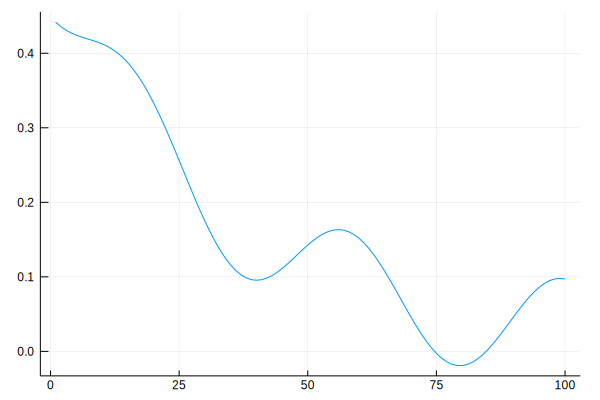

In [17]:
using LinearAlgebra
A = [ 0.855 1.161 0.667;
0.015 1.073 0.053;
-0.084 0.059 1.022 ];
B = [-0.076; -0.139; 0.342 ];
C = [ 0.218 -3.597 -1.683 ];
n = 3; p = 1; m = 1;
x_init = [0.496; -0.745; 1.394];
x_des = zeros(n,1);
T = 100;
yol = zeros(T,1);
Xol = [ x_init zeros(n, T-1) ];
for k=1:T-1
Xol[:,k+1] = A*Xol[:,k];
end;
yol = C*Xol;
using Plots
plot(1:T, yol', legend = false)

In [18]:
rho = 0.2;
T = 100;
x, u, y = lqr(A,B,C,x_init,x_des,T,rho)
J_input = norm(u)^2

0.7738942551160125

In [19]:
J_output = norm(y)^2

3.7829986463324596

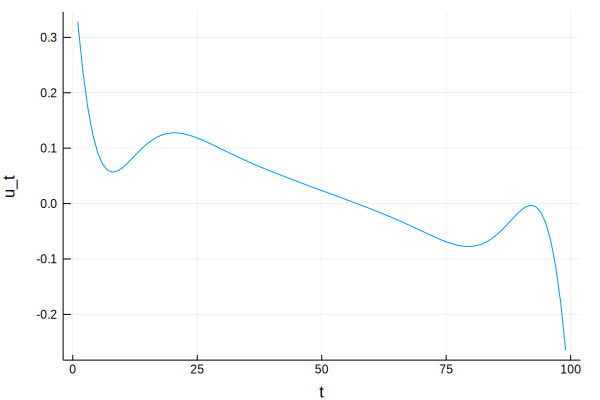

In [20]:
plot(1:T-1, vcat(u...), legend = false, xlabel="t",ylabel= "u_t")

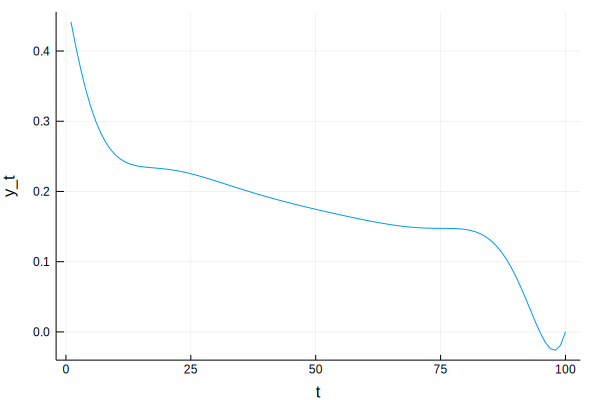

In [21]:
plot(1:T, vcat(y...), legend=false, xlabel = "t",ylabel = "y_t")

# Application2: Linear quadratic state estimation

# Linear dynamical system equations
$x_{t+1}=A_{t} x_{t}+B_{t} w_{t}$

$y_{t}=C_{t} x_{t}+v_{t}$

$J_{\mathrm{meas}}=\left\|v_{1}\right\|^{2}+\cdots+\left\|v_{T}\right\|^{2}=\left\|C_{1} x_{1}-y_{1}\right\|^{2}+\cdots+\left\|C_{T} x_{T}-y_{T}\right\|^{2}$

$J_{\mathrm{proc}}=\left\|w_{1}\right\|^{2}+\cdots+\left\|w_{T-1}\right\|^{2}$

Least squares state estimation. We will make our guesses of x1, . . . , xT and
w1, . . . , wT −1 so as to minimize a weighted sum of our objectives, subject to the dynamics constraints:
              
   minimize $J_{\mathrm{meas}}+\lambda J_{\mathrm{proc}}$

  subject to $x_{t+1}=A_{t} x_{t}+B_{t} w_{t}$